In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [119]:
trait_renaming = pd.read_csv(
    "../../results/gwas_gokcen/raw/disease_list.txt", delim_whitespace=True, header=None,
    names=["trait", "source", "name"]
).set_index("trait")["name"].to_dict()
trait_renaming

{'AD': 'alzheimers_disease',
 'ADHD': 'attention_deficit_hyperactivity_disorder',
 'AIT': 'autoimmune_disease',
 'ASM': 'asthma',
 'BMD-HT': 'bone_mineral_density',
 'BMI': 'body_mass_index',
 'BP': 'bipolar_disorder',
 'Breast_cancer': 'breast_cancer',
 'CAD': 'coronary_artery_disease',
 'CD': 'crohns_disease',
 'Celiac': 'celiac',
 'CVD': 'cardiovascular_disease',
 'ECOL': 'college_educatiojn',
 'Eczema': 'eczema',
 'EY': 'years_education',
 'FG': 'fasting_glucose',
 'Glucose': 'glucose',
 'HbA1c': 'hba1c',
 'HDL': 'hdl',
 'Height': 'height',
 'HT': 'hypothyroidism',
 'HTN': 'hypertension',
 'IBD': 'inflammatory_bowel_disease',
 'Insomnia': 'insomnia',
 'Intel': 'intelligence',
 'LDL': 'ldl',
 'MCH': 'mean_corpuscular_hemoglobin',
 'MDD': 'major_depressive_disorder',
 'MNP': 'morning_person',
 'MNR': 'age_of_menarche',
 'MS': 'multiple_sclerosis',
 'NRT': 'neuroticism',
 'PLT': 'platelet_count',
 'RA': 'rheumatoid_arthritis',
 'RBC': 'red_count',
 'RDW': 'red_blood_cell_width',
 'RR-

In [113]:
enformer_renaming = pd.read_csv("../../results/metadata/Enformer.csv").set_index("name").description.str[:30].to_dict()
borzoi_renaming = pd.read_csv("../../results/metadata/Borzoi.csv").set_index("name").description.str[:30].to_dict()

In [116]:
traits = [
    "IBD",
    "Height",
    "CD",
    "BMD-HT",
    "PLT",
    "TG",
    "EY",
    "BMI",
    "MNR",
    "Breast_cancer",
    "MNP",
]

models = [
    "Enformer_L2",
    "Borzoi_L2",
    "CADD",
    "GPN-MSA_InnerProducts",
]

dfs = []
n_hits = {}

for trait in traits:
    base_dir = f"../../results/dataset/gwas_gokcen_{trait}_cre_matched_9/"
    n_hits[trait] = len(pd.read_parquet(base_dir + "test.parquet")) // 10
    for model in models:
        df = pd.read_csv(base_dir + f"unsupervised_metrics/{model}.csv")
        if model == "Enformer_L2":
            df.feature = df.feature.map(enformer_renaming)
            df = df.drop_duplicates("feature")
        elif model == "Borzoi_L2":
            df.feature = df.feature.map(borzoi_renaming)
            df = df.drop_duplicates("feature")
        df = df.head(3)
        df["trait"] = trait
        df["model"] = model
        dfs.append(df)
df = pd.concat(dfs)
df

,AUPRC,feature,trait,model
0,0.156403,"CHIP:H3K27me3:CD8-positive, al",IBD,Enformer_L2
1,0.151142,CHIP:EZH2:PC-3,IBD,Enformer_L2
2,0.149873,"CHIP:H3K27me3:CD4-positive, al",IBD,Enformer_L2
0,0.154290,CHIP:H3K27me3:naive thymus-der,IBD,Borzoi_L2
1,0.152156,"CHIP:H3K27me3:CD4-positive, al",IBD,Borzoi_L2
...,...,...,...,...
1,0.331973,EncodetotalRNA-max,MNP,CADD
2,0.331818,EncodetotalRNA-sum,MNP,CADD
0,0.449250,embedding_518,MNP,GPN-MSA_InnerProducts
1,0.426414,embedding_35,MNP,GPN-MSA_InnerProducts


KeyError: 'col_name'

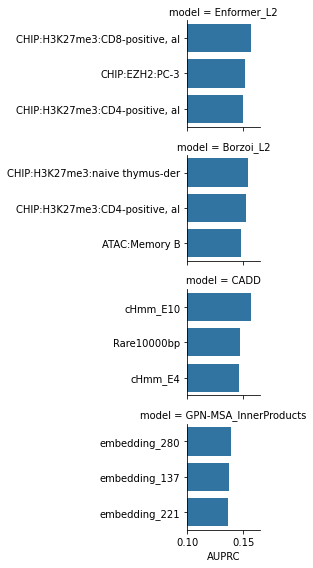

In [132]:
for trait in traits:
    g = sns.catplot(
        data=df[df.trait == trait],
        y="feature",
        x="AUPRC",
        row="model",
        sharex=True,
        sharey=False,
        kind="bar",
        #kind="point", join=False,
        color="C0",
        height=2,
        aspect=2,
        #height=2,
        #aspect=2,
    )
    g.set(
        xlim=0.1,
        ylabel="",
    )
    plt.suptitle(
        trait_renaming[trait] + f"\n(n causal={n_hits[trait]})",
        y=1.05
    )
    #plt.savefig("top_features.pdf", bbox_inches="tight")
    plt.show()

/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

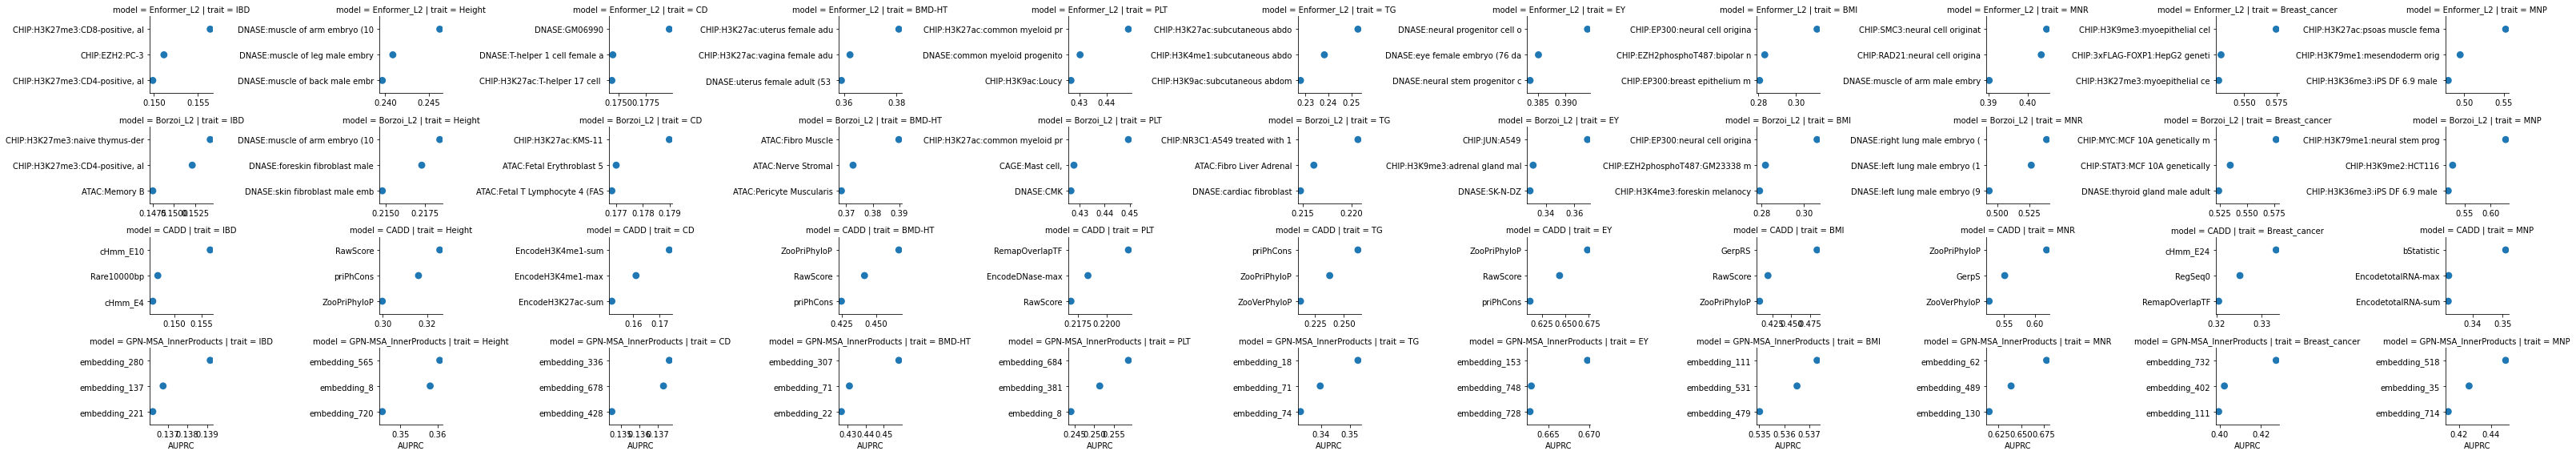

In [117]:
g = sns.catplot(
    data=df,
    y="feature",
    x="AUPRC",
    row="model",
    col="trait",
    #sharex=True,
    sharex=False,
    sharey=False,
    #kind="bar",
    kind="point", join=False,
    color="C0",
    height=2,
    aspect=2,
)
# increase space between columns:
#g.fig.subplots_adjust(wspace=2.0)
g.set(
    #xlim=0.5,
    ylabel=""
)
#plt.savefig("top_features.pdf", bbox_inches="tight")